# Diabetes Prediction (Decision Tree)

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from pickle import dump

In [2]:
# Load data
df = pd.read_csv('../data/processed/diabetes_clean.csv')
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,diabetes
1,1,85,66,29,0,26.6,0.351,31,no_diabetes
2,8,183,64,0,0,23.3,0.672,32,diabetes
3,1,89,66,23,94,28.1,0.167,21,no_diabetes
4,0,137,40,35,168,43.1,2.288,33,diabetes


In [3]:
# Split data into train and test sets
df_train, df_test = train_test_split(df, test_size=0.1, stratify=df['outcome'], random_state=2025)

# Reset index
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_test.shape

((691, 9), (77, 9))

In [4]:
# Split features and target
X_train = df_train.drop(columns=['outcome'])
y_train = df_train['outcome']

X_test = df_test.drop(columns=['outcome'])
y_test = df_test['outcome']

# Encode target
encoder = LabelEncoder()

y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

In [5]:
# Training the model 
tree_clf = DecisionTreeClassifier(random_state=2025)
tree_clf.fit(X_train, y_train_enc)

y_pred = tree_clf.predict(X_test)

'Accuracy score:'

0.6753246753246753

'              precision    recall  f1-score   support\n\n    diabetes       0.55      0.44      0.49        27\n no_diabetes       0.73      0.80      0.76        50\n\n    accuracy                           0.68        77\n   macro avg       0.64      0.62      0.63        77\nweighted avg       0.66      0.68      0.67        77\n'

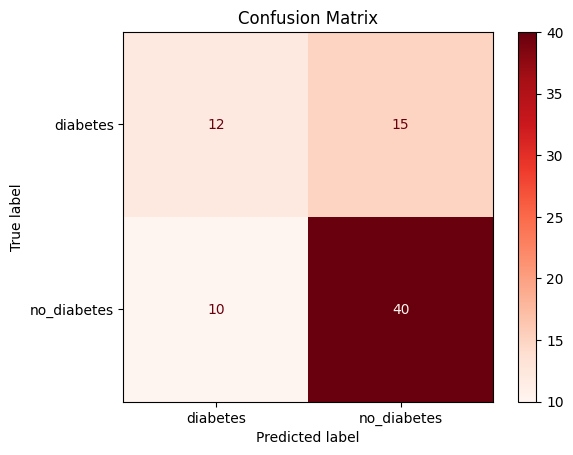

In [6]:
display('Accuracy score:', accuracy_score(y_test_enc, y_pred))
display(classification_report(y_test_enc, y_pred, target_names=df['outcome'].unique()))

cm = confusion_matrix(y_test_enc, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['outcome'].unique())
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

- This model has an accuracy of 0.67 with:
    - 12 True Positives
    - 40 True Negatives
    - 10 False Positives
    - 15 False Negatives

In this case the model has low recall for diabetes (0.44). A significant number of the actual positive cases have been classified as negative, which in this case can have serious consequences. The optimization will be made towards improving recall instead of accuracy. 


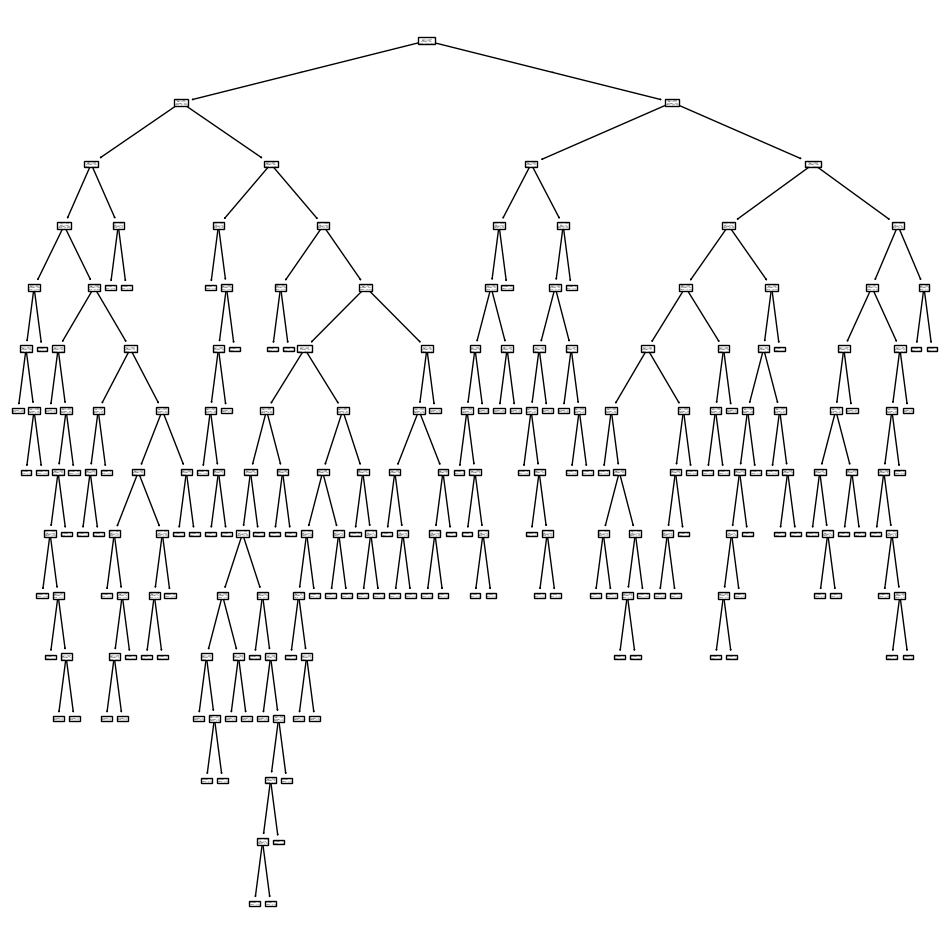

In [7]:
fig = plt.figure(figsize=(12,12))

plot_tree(tree_clf)
plt.show()

# Optimization

In [8]:
param_grid = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"]
}

tree_clf_cv = GridSearchCV(
    tree_clf,
    param_grid=param_grid,
    scoring="recall", 
    cv=5
)

tree_clf_cv.fit(X_train, y_train_enc)

tree_clf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

'Accuracy score after CV:'

0.7922077922077922

'              precision    recall  f1-score   support\n\n    diabetes       0.72      0.67      0.69        27\n no_diabetes       0.83      0.86      0.84        50\n\n    accuracy                           0.79        77\n   macro avg       0.77      0.76      0.77        77\nweighted avg       0.79      0.79      0.79        77\n'

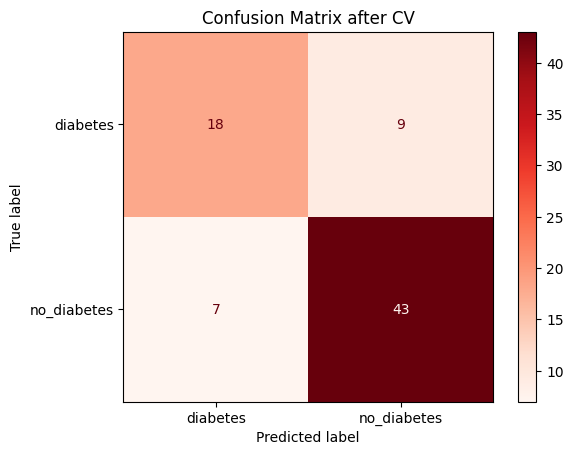

In [9]:
y_pred_cv = tree_clf_cv.predict(X_test) # New predictions

display('Accuracy score after CV:', accuracy_score(y_test_enc, y_pred_cv))
display(classification_report(y_test_enc, y_pred_cv, target_names=df['outcome'].unique()))

# Plot confusion matrix after CV
cm_cv = confusion_matrix(y_test_enc, y_pred_cv)
disp_cv = ConfusionMatrixDisplay(confusion_matrix=cm_cv, display_labels=df['outcome'].unique())
disp_cv.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix after CV")
plt.show()


This optimized model improves 0.23 points in recall in comparison with the latest one. It also has an improved accuracy of 0.79. 

In [10]:
# Save model
dump(tree_clf, open("../models/decision_tree_clasifier_raw.sav", "wb")) 
dump(tree_clf_cv, open("../models/decision_tree_clasifier_optimized.sav", "wb"))